In [16]:
import pandas as pd
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import copy

In [2]:
train = pd.read_csv("/home/kuba/wakacje/machine lerning/train.csv")

In [4]:
train = np.array(train)
X = train[:,1:]
y = train[:,0]

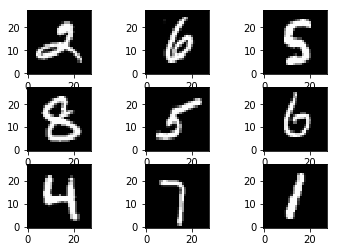

In [5]:
# lets see how does it look 
p = [[0 for i in range(28)]for i in range(28) ]

# we randomly choose 9 images 
rand = np.random.randint(0,28000,9)


fig = plt.figure()
# which plot
k = 0
for rand_ind in rand:
    
    for i in range(27):
        pixels = X[rand_ind,::-1]
        p[i] = list(pixels[28*i:28*(i+1)])
    p = np.fliplr(p)
    # 3x3 grid and which plot
    fig.add_subplot(331 + k)
    k += 1
    plt.imshow(p, 'gray', origin='lower',interpolation='none')

plt.show()

In [6]:
# Let's choose architecture for our NN

# input layer
L1 = X.shape[1]
#hidden layers: 
L2 = 25
L3 = 25
# output layer 
L4 = 10

eps = np.sqrt(6)/np.sqrt(L1 + L4)
size = (L1+1)*L2 + (L2+1)*L3 + (L3+1)*L4
thetas = np.random.uniform(-eps,eps,size)

In [7]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [13]:
# Let's make cost function
def CostFunction(thetas, L1, L2, L3, L4, X, y , lambda_ = 0.0): 
    """
    thetas - numpy list of parameters, expected random
    L1, ..., L4 - layer sizes
    X, y - Data numpy nd arrays
    """
    # firstly we roll out thetas to matrices of layer parameters, 
    downfrom, upto = 0, (L1+1)*L2
    theta1 = thetas[downfrom:upto].reshape(L1+1,L2)
    downfrom, upto = upto, upto + (L2+1)*L3
    theta2 = thetas[downfrom:upto].reshape(L2+1,L3)
    downfrom, upto = upto, 0
    theta3 = thetas[downfrom:].reshape(L3+1,L4)
    
    # size of dataset
    m = y.size
    
    # future gradients
    Theta1_grad = np.zeros((theta1.shape))
    Theta2_grad = np.zeros((theta2.shape))
    Theta3_grad = np.zeros((theta3.shape))
    
    # changing y to vector 
    y_vec = np.zeros((m,L4))
    for i in range(m): 
        y_vec[i,y[i]] = 1
    
    # forward Propagation 

    a1 = np.c_[np.ones((m,1)),X]   # m x n+1

    a2 = sigmoid( a1 @ theta1) 
    a2 = np.c_[np.ones((m,1)),a2]

    a3 = sigmoid( a2 @ theta2) 
    a3 = np.c_[np.ones((m,1)),a3]

    a4 = sigmoid( a3 @ theta3)

    # value of cost is not vectorized because of memory reasons
    J = 0
    for i in range(m) :
        J += (1/m)* (np.log(a4[i,:]) @ (-y_vec[i,:]).T - (np.log(1 - a4[i,:])) @ (1 - y_vec[i,:]).T)    

    # without biases
    t1 = theta1[:, 1:]
    t2 = theta2[:, 1:]
    t3 = theta3[:, 1:]
    reg = lambda_/(2*m) *( (t1**2).sum() + (t2**2).sum() + (t3**2).sum())  

    J = J + reg

    #backpropagation

    err4 = a4 - y_vec 

    #derivative of sigmoid is ai*(1-ai)
    err3 = (err4 @ theta3.T) * (a3*(1-a3))    #42000x10 @ 10x26 * 42000x26
    # without bias
    err3 = err3[:,1:]

    err2 = (err3 @ theta2.T) * (a2*(1-a2))
    err2 = err2[:,1:]

    delta1 = a1.T @ err2
    delta2 = a2.T @ err3 
    delta3 = a3.T @ err4

    d1 = lambda_/m * theta1[:,1:]
    d2 = lambda_/m * theta2[:,1:]
    d3 = lambda_/m * theta3[:,1:]

    Theta1_grad = delta1/m
    Theta2_grad = delta2/m    
    Theta3_grad = delta3/m

    Theta1_grad[:,1:] += d1
    Theta2_grad[:,1:] += d2
    Theta3_grad[:,1:] += d3

    return J, np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel(), Theta3_grad.ravel()])

In [ ]:
def gradient_analitical(thetas, X,y): 

In [ ]:
# let's chceck if we have non-buggy implementation
J, grad = CostFunction(thetas, L1, L2,L3,L4,X,y)
m = grad.size
grad2 = np.zeros(m)

epsilon = 0.0001

for i in range(m): 
    thetas_1 = copy.copy(thetas)
    thetas_2 = copy.copy(thetas)
    thetas_1[i] -= epsilon
    thetas_2[i] -= epsilon

    grad2[i] = (CostFunction(thetas_1, L1, L2,L3,L4,X,y)[0] - CostFunction(thetas_2, L1, L2,L3,L4,X,y)[0])/(2*epsilon) 

In [ ]:


a1 = np.c_[np.ones((m,1)),X]   # m x n+1

a2 = sigmoid( a1 @ theta1) 
a2 = np.c_[np.ones((m,1)),a2]

a3 = sigmoid( a2 @ theta2) 
a3 = np.c_[np.ones((m,1)),a3]

a4 = sigmoid( a3 @ theta3)

# value of cost is not vectorized because of memory reasons
J = 0
for i in range(m) :
    J += (1/m)* (np.log(a4[i,:]) @ (-y_vec[i,:]).T - (np.log(1 - a4[i,:])) @ (1 - y_vec[i,:]).T)    

# without biases
t1 = theta1[:, 1:]
t2 = theta2[:, 1:]
t3 = theta3[:, 1:]
reg = lambda_/(2*m) *( (t1**2).sum() + (t2**2).sum() + (t3**2).sum())  

J = J + reg

#backpropagation

err4 = a4 - y_vec 

#derivative of sigmoid is ai*(1-ai)
err3 = (err4 @ theta3.T) * (a3*(1-a3))    #42000x10 @ 10x26 * 42000x26
# without bias
err3 = err3[:,1:]

err2 = (err3 @ theta2.T) * (a2*(1-a2))
err2 = err2[:,1:]

delta1 = a1.T @ err2
delta2 = a2.T @ err3 
delta3 = a3.T @ err4

d1 = lambda_/m * theta1[:,1:]
d2 = lambda_/m * theta2[:,1:]
d3 = lambda_/m * theta3[:,1:]

Theta1_grad = delta1/m
Theta2_grad = delta2/m    
Theta3_grad = delta3/m

Theta1_grad[:,1:] += d1
Theta2_grad[:,1:] += d2
Theta3_grad[:,1:] += d3


gradd = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel(), Theta3_grad.ravel()])
gradd